## **Task 1: Load and preprocess the dataset**

•	Import the required libraries (NumPy and Matplotlib)

•	Load the dataset (linearly separable) using the load_data() method

•	Normalize the dataset by dividing the pixel values by 255

•	Split the dataset into training and test sets using train_test_split() method.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Normalize the dataset to scale pixel values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Print the shapes of normalized data arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


##**Task 2: Visualize the dataset**

•	Visualize some random images from the dataset using Matplotlib's imshow() method


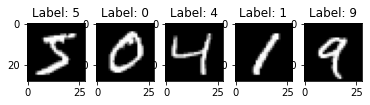

In [ ]:
# Display some sample images
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].set_title(f"Label: {y_train[i]}")
plt.show()

##**Task 3: Implement the Simple Perceptron model**

•	Define the Simple Perceptron model with a single layer of output nodes and no hidden layers

•	Implement the forward propagation algorithm to compute the output of the model

•	Implement the backward propagation algorithm to update the weights and bias term of the model

•	For weight update, use the formula given below:

` wᵢ = wᵢ + ∆wᵢ` 

Where	`∆wᵢ  = η(t - o) xᵢ`

Where:
-	t is actual value
-	o is perceptron output
-	η is small constant (0.001) called learning rate


In [ ]:
# Find the indices of all data points where label is not 0 or 1
train_indices_rmv = np.where((y_train != 0) & (y_train != 1))
test_indices_rmv = np.where((y_test != 0) & (y_test != 1))

# Remove these indices from all datasets since we are implementing a simple binary perceptron
X_train = np.delete(X_train, train_indices_rmv, axis=0)
y_train = np.delete(y_train, train_indices_rmv, axis=0)

X_test = np.delete(X_test, test_indices_rmv, axis=0)
y_test = np.delete(y_test, test_indices_rmv, axis=0)

In [ ]:
# Flatten the images to convert them to 1D vector
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Print the shapes of the flattened data arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12665, 784)
X_test shape: (2115, 784)
y_train shape: (12665,)
y_test shape: (2115,)


In [ ]:
def step_function(prediction):
    """
    Returns 1 if prediction is greater than or equal to zero, otherwise returns 0
    """
    if prediction >= 0:
        return 1
    return 0

def predict(X, weights, bias):
    """
    Returns binary classification based on the weighted sum of inputs
    """
    # Calculate the weighted sum of inputs and add bias
    prediction = np.dot(weights, X) + bias

    # Apply the activation function
    prediction = step_function(prediction)
    return prediction

In [ ]:
def forward_propagation(X, y, weights, bias):
    """
    Returns predicted output, loss value, and derivative of the loss with respect to the predicted output.
    """

    # Compute the predicted output for the given data point
    y_pred = predict(X, weights, bias)

    # Compute the loss for the given data point using mean squared error
    loss = (y_pred - y) ** 2

    # Compute the derivative of the loss with respect to the predicted output
    d_loss = 2 * (y_pred - y)

    return y_pred, loss, d_loss

In [ ]:
def backward_propagation(x, d_loss, y_true, y_pred, weights, bias, learning_rate):
    """
    Returns updated weights and bias after backward propagation.
    """

    # Compute the change in weights based on the derivative of the loss
    delta_weights = learning_rate * (y_true - y_pred) * x
    
    # Update the weights and bias of the model
    weights = weights + delta_weights
    bias = bias + learning_rate * (y_true - y_pred)
    
    return weights, bias

##**Task 4: Train the Simple Perceptron model**

•	Set the number of epochs and the learning rate for the training process

•	Iterate over the training examples and adjust the weights and bias term using the above equation


In [ ]:
def train_perceptron(X, y, learning_rate):
    """
    Trains the model using the input data and target values.
    Returns weights, bias of the trained perceptron model and list of mean squared errors for each epoch during training.
    """
    
    # Initialize variables
    epoch = 0
    error = 999
    error_threshold = 9e-4
    weights = np.random.rand(X.shape[1])
    bias = np.random.rand()
    errors = []
    epochs = []
    
    # Train until stopping conditions are met
    while epoch <= 10 and error > error_threshold:
        
        total_loss = 0
        
        # Loop over every data point
        for i in range(X.shape[0]):
            
            # Forward Propagation on each data point
            y_pred, loss, d_loss = forward_propagation(X[i], y[i], weights, bias)

            # Backward propagation to update weight and bias
            weights, bias = backward_propagation(X[i], d_loss, y[i], y_pred, weights, bias, learning_rate)
            
        # Evaluate the results
        for i in range(X.shape[0]):
            y_pred, loss, d_loss = forward_propagation(X[i], y[i], weights, bias)
            total_loss += loss

        errors.append(total_loss / X.shape[0])
        epochs.append(epoch)
        error = errors[-1]
        epoch += 1

        print(f'Epoch {epoch}. Loss: {errors[-1]}')
        
    return weights, bias, errors

In [ ]:
# Train the perceptron model using the training data
# and obtain the optimized weights, bias and training errors
weights, bias, errors = train_perceptron(X_train, y_train, learning_rate=0.001)

Epoch 1. Loss: 0.01626529806553494
Epoch 2. Loss: 0.011054086063955783
Epoch 3. Loss: 0.007895775759968417
Epoch 4. Loss: 0.006553493880773786
Epoch 5. Loss: 0.005527043031977891
Epoch 6. Loss: 0.004895380971180419
Epoch 7. Loss: 0.0043426766679826295
Epoch 8. Loss: 0.0039478878799842085
Epoch 9. Loss: 0.0036320568495854717
Epoch 10. Loss: 0.0035530990919857876
Epoch 11. Loss: 0.0035530990919857876


##**Task 5: Evaluate the performance of the Simple Perceptron model on the test set**
•	Compute the accuracy of the Simple Perceptron model on the test set


In [ ]:
def calculate_accuracy(X_test, y_test, weights, bias):
    """
    Returns accuracy of the model on the test set.
    """
    
    # Initialize True Positive, True Negative, False Positive and False Negative
    true_positives, true_negatives, false_positives, false_negatives = 0, 0, 0, 0

    # Loop over each sample and corresponding label in the test set
    for sample, label in zip(X_test, y_test):

        # Make a prediction using the perceptron model
        prediction = predict(sample, weights, bias)

        # Update counts for TP, TN, FP, and FN
        if prediction == label:
            if prediction == 1:
                true_positives += 1
            else:
                true_negatives += 1
        else:
            if prediction == 1:
                false_positives += 1
            else:
                false_negatives += 1

    # Calculate accuracy using the counts
    accuracy = (true_positives + true_negatives)/(true_positives + true_negatives + false_positives + false_negatives)
    return accuracy

In [ ]:
# Calculate the accuracy of the model on the test set.
acc = calculate_accuracy(X_test, y_test, weights, bias)
print(f'Accuracy: {acc*100:.2f}%')

Accuracy: 99.86%


##**Task 6: Analysis on the results**
•	Are the accuracy scores satisfactory or not? If not, what measures can be taken to improve the accuracy scores? Please express your ideas in your own words.
<br><br>
> **Are the Accuracy Scores Satisfactory?**

The binary digit classifier achieved an impressive accuracy score of **99.86%** on the test dataset. This means that the model was able to correctly classify **2112 images out of total 2115 images** provided to it, demonstrating its ability to learn the task and generalize its knowledge to new images. The accuracy score is a crucial metric to evaluate the performance of a machine learning model, and in this case, the high score reflects the model's precise differentiation between digits.
<br><br>
> **Analysing Perceptron's Decision Making**

Our analysis of the optimized weights of the Perceptron provides us with valuable insights into how the model makes decisions. By converting the optimized weight vector into a 28x28 matrix, we were able to identify the pixels in the training images that the Perceptron considers most significant. We reached following conclusions:

*   Perceptron's optimized weights show the shape of a zero, with the pixels that form the zero having a blackish hue. The negative weights of these pixels indicate their high absolute value, and when activated by a zero, they produce a negative result.

*   Perceptron gives positive weights to the central pixels of the image, which correspond to the shape of a one. 



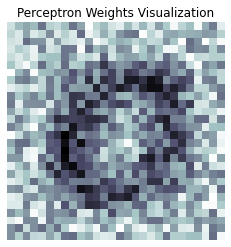

In [ ]:
# Resize the weights array to match the dimensions of the input images (28x28)
weights.resize((28, 28))

# Plot the weights as an image
plt.imshow(weights, cmap='bone')
plt.axis('off')
plt.title('Perceptron Weights Visualization')
plt.show()

> **What Measures Can be Taken to Improve the Accuracy Scores?**

While the accuracy score achieved were excellent, there are still some measures that can be taken to further improve the accuracy scores. Some of these measures include:

* **Increasing the complexity of the model:** The current model is a simple single-layer Perceptron. By increasing the complexity of the model, such as adding more layers we may be able to further improve the accuracy score.

* **Augmenting the dataset:** Data augmentation techniques can be used to generate additional training examples by applying transformations like rotation, scaling, and flipping to the existing images. This can increase the diversity of the training data and improve the model's ability to generalize.

* **Tuning hyperparameters:** Hyperparameters such as learning rate can significantly impact the performance of a machine learning model. By tuning these hyperparameters, we may be able to further improve the accuracy score.
<br><br>
<hr>